# Salary Range For Employees

## Postgres Database Conection

### Function to Connect the Postgres Database

In [12]:
import pandas as pd
from sqlalchemy import create_engine
from config import (ServerName, UserName, Password, port)
import psycopg2


def getData(DataBase, sql):
    engine = create_engine(f'postgres+psycopg2://{UserName}:{Password}@{ServerName}:{port}/{DataBase}')
    df_query = pd.read_sql(sql, engine)
    return df_query

### Query of the Database using the Function

In [13]:
# Define the query
sql = "select * from salaries"

# Store the query in a dataframe Table = "Employee"
salaries_df = getData("Employee", sql)

# Print Dataframe
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


## Barchart 

### Bin Creation for Salaries

In [14]:
bins = [0, 49999, 59999, 69999, 79000, 89999,
        99999, 109999, 119999, 129999]

# Create labels for these bins
group_labels = ["0 to 49k", "50k to 59k", "60k to 69k", "70k to 79k", "80k to 89k", "90k to 99k",
                "100k to 109k", "110k to 119k", "120k to 129k"]

In [15]:
# Creating a new column with the salary ranges
salaries_df["Salary Range"] = pd.cut(salaries_df["salary"], bins, labels=group_labels)
# Print it
salaries_df.head()

,emp_no,salary,from_date,to_date,Salary Range
0,10001,60117,1986-06-26,1987-06-26,60k to 69k
1,10002,65828,1996-08-03,1997-08-03,60k to 69k
2,10003,40006,1995-12-03,1996-12-02,0 to 49k
3,10004,40054,1986-12-01,1987-12-01,0 to 49k
4,10005,78228,1989-09-12,1990-09-12,70k to 79k


In [16]:
# Group the Dataframe by Salary Range and Count
salaries_group_df = salaries_df.groupby("Salary Range")
# Count the number of employees
salaries_barchart_df = salaries_group_df[["emp_no"]].count()
# Rename the column to one more signifying
salaries_barchart_df = salaries_barchart_df.rename(columns={"emp_no" : "No. of Employees"})
salaries_barchart_df


,No. of Employees
Salary Range,
0 to 49k,158465
50k to 59k,57915
60k to 69k,41413
70k to 79k,23064
80k to 89k,13595
90k to 99k,4284
100k to 109k,1069
110k to 119k,195
120k to 129k,24


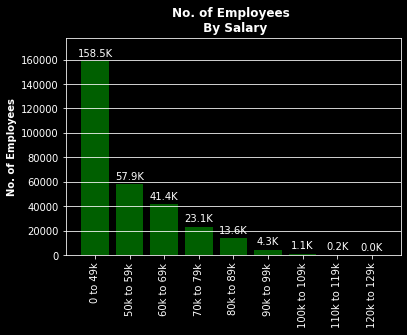

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


range_Salary = group_labels
no_employees = salaries_barchart_df["No. of Employees"]



x_axis = np.arange(len(no_employees))
rects = plt.bar(x_axis, no_employees, color='green', alpha=0.75, align="center");

tick_locations = [value for value in x_axis];




# Function to show the format of the y axis in millions
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x*1e-3)
# Define the Formatter
formatter = FuncFormatter(thousands)



# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('No. of Employees',fontweight="bold")
plt.title('No. of Employees \n By Salary',fontweight="bold")
plt.xticks(tick_locations, group_labels, rotation=90)
#plt.yaxis.set_major_formatter(formatter)

plt.grid(b=None, which='major', axis='y')

# Establish the upper limit of the plot
plt.ylim([0, round(max(no_employees),-3)+2e4])


# Function to  Autolabel columns in millions
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:,.1f}K'.format(height/1e3),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

#plt.figure(figsize = [5, 5]);
        
# Save Plot
plt.savefig("Fig 1. No. of Employees By Salary" +'.png',bbox_inches='tight');

autolabel(rects);